# Registro de imagens

A ideia principal dos registros de imagens pode ser definido como:

* Identificar pontos de uma imagem que são equivalentes em outra imagem

## Motivação
Uma ideia é de identificar objetos que são identicos em diferentes imagens, ou seja, identificar as estruturas que são equivalentes mas tiveram uma certa deslocação

Uma aplicação para tal é dado duas fotografias tirados em diferentes lugares, cosneguir mapear uma imagem com as duas imagens, ou seja, aumentar a imagem ou propriamente tirar uma foto panoramica por exemplo.

Um outro exemplo é de mesclar diferentes imagens tiradas do mesmo lugar só que com a interligação da imagem.

Um outro exemplo é de identificar um objeto e mapear para fazer realidade aumentada, ou seja, um objeto plano, consegue-se ter uma realidade aumentada pra mostrar, seila, um lobo 3d em cima da superficie

Outro exemplo é para fazer estabilização de video, para caso tenha um video tremido por exemplo, ele estabiliza a gravação

Uma outra aplicação é dado um objeto que uma pessoa tirou uma foto dele em determinada posição e outra foi tirado em outro angulo, consegue-se estimar a trasnformação da camera, ou seja, a distancia entre uma camera e outra. É importante ter tambem algumas informações da camera que foi tirada.

## Pratica

Para fazer diferentes tipos de processamentos de registro de imagens temos etapas para a execução:

1. Critério de registro ( que tipo de dados serão mais importantes da imagem/video)

* pontos salientes (são os pontos relevantes da imagem, um exemplo é tipo, uma foto da lousa, os pontos salientes é os que tem mais imformação)
    * Alta informação (ou o usuario seleciona quais são os pontos de importancia)
    
Dado uma imagem que contem um objeto de interesse e ele se desloca em diferente lugar na imagem, precisamos saber quais são os pontos que ele se deslocou, seja por rotação ou propriamente por trasnladação

* São pontos baseados em intensidade, ou seja, comparar a intensidade dos vizinhos proximos do ponto de interesse
    * Uma desvantagem para tal metodo é mais custoso

2. Trasnformação espacial

* Hipotese sobre a trasnformação sofrida pela imagem (ou seja, em hipotese temos que pode ser a trasnlação, rotação etc que a imagem sofreu em diferentes espaços da imagem)

*Nas proximas aulas focaremos bastante nas trasnformações espaciais de uma image*

### Alguns exemplos

* Translação rigida : Rotação + Translação

* Translação Afim : É um tipo de translação generalista, ou seja, que calcula a escala, a translação e a rotação

* Translação deformavel: Assume-se que em diferentes regiões da imagem, terão trasnformações diferentes

* trasnlação projetiva: vem de projeção, ou seja, em determinado lado vai ter mais informação do que outro

3. Otimização

* Otimização dos parametros da transformação (ou seja, encontrar os parametros adequados das trasnformações)

4. Interpolação

Normalmente se faz a interpolação das intensidades, ou seja, encontrar o valor mais adequado para a pós processamento

5. Métrica de qualidade

É necessario saber o quão bem você conseguiu resolver o problema que vc encontrou na imagem, assim, precisamos de metrica de qualidade para avaliar. 

* Diferença quadratica

A métrica bem comum de se usar é das diferençãs quadraticas, tanto nos pontos salientes quanto para as intensidades.

* correlação, ou seja, da correlação de pearson para comparação de imagens

* Informação Mútua (é uma outra forma de avaliar, mas não estudaremos ela)

Tendo uma imagem de referencia fixa, teremos outra imagem que será a imagem transformada

![esquema1](esquema1.png)

In [1]:
import cv2 as cv
import numpy as np

def get_video_info(cap):
    info = {}
    info['fps'] = cap.get(cv.CAP_PROP_FPS)
    info['width'] = cap.get(cv.CAP_PROP_FRAME_WIDTH)
    info['heigth'] = cap.get(cv.CAP_PROP_FRAME_HEIGHT)
    codec_int = int(cap.get(cv.CAP_PROP_FOURCC))
    codec_bin = bin(codec_int)
    codec = ''
    for i in range(4):
        codec += chr(int(codec_bin[i*8 : (i+1)*8 ], 2))
    info['codec'] = codec[::-1]
    
    return info

def set_frame_from_seconds(cap, seconds):
    
    fps = cap.get(cv.CAP_PROP_FPS)
    frame_number = int(fps*seconds)
    cap.set(cv.CAP_PROP_POS_FRAMES, frame_number)
    
    
cap = cv.VideoCapture("../sherbrooke_video.wm")
info = get_video_info(cap)
print(info)
set_frame_from_seconds(cap, 15)

while True:
    
    ret, img = cap.read()
    if ret:
        cv.imshow('frame', img)
        
    k = cv.waitKey(30)
    if k!= -1:
        print(k)
    if k == 27:
        break
        

cap.release()
cv.destroyAllWindows()
cv.waitKey(1)

{'fps': 30.0, 'width': 800.0, 'heigth': 600.0, 'codec': 'avc1'}
27


-1

## Transformações geométricas

* Translação
    * dado um ponto de referencia, teremos um valoor tx e ty para verificar o quanto ele transladou, teremos um novopixel chamado de x' = x + tx e y' = y + ty, que será o ponto onde o ponto de referencia esta apos a trasnlação
    * podemos escrever as formulas de forma matricial da seguinte forma
    
[x'] = [1 0 tx] * [x]

[y'] = [0 1 ty] * [y] e 1 em baixo nessa ultima matrix

r'-> = T * r->

* Rotação em torno da origem
    * para fazer a rotação precisamos sempre de um ponto de referencia, mas veremos aqui como fazer em relação a origem, mas com isso, conseguimos fazer outra rotação com tranlação e teremos o objeto rotacionado
    * 

![graficorotacao](grafico_angulacao.png)

* Euclidiana (ou rigina, uma tranlação mais uma rotação)
* Similiaridade
* Afim
* Projetiva

# Revisão

Vimos até então sobre as trasnformações geométricas, vimos a ideia de translação

[x'] = [1 0 tx] * [x]

[y'] = [0 1 ty] * [y] com 1 em baixo (sendo esse x, y 1 uma matrix 3x1)

r-> = T r->

Rotação em relação a origem:

[x'] = [cos $\theta - sen \theta$] * [x]

[y'] = [$sen\theta cos\theta$] * [y com 1 em baixo]

Rotção em relação a um ponto c = (cx, cy)

[x'] = [cos $\theta - sen \theta$] * [x - cx] + [cx]

[y'] = [$sen\theta cos\theta$] * [y - cy com 1 em baixo] + [cy]

Outra forma de fazer isso:

T1 = [1 0 -cx]

T1 = [0 1 -cy]

,

T2 = [1 0 cx]

T2 = [0 1 cy]

Assim aplicamos:

[x'] = T2 * Tr * T1 * [x']

[y'] = T2 * Tr * T1 * [y' com 1 em baixo]

sendp Tr a matrix de rotação ja vista acima

Vemos tambem na aula passada a *transformação rigida* , que consiste em uma translação somado com a rotação, dada pela formula

[x'] = [cos$\theta - sen \theta tx$] * [x]

[y'] = [sen$\theta cos\theta ty$] * [y com 1 em baixo]

Trasnformação de escala

A trasnformação de escala faz com que o objeto fique maior, mas afasta ele da origem, se s eh menor que 1 ele diminui o objeto e fica mais proximo da origem

[x'] = [s 0 0] * [x]

[y'] = [0 s 0] * [y com 1 em baixo]

x' = sx

y' = sy

sendo o s o valor da trasnformação

#### Trasnformação similaridade

ela eh composta pela trasnlação + rotação + escala, ou seja

[x'] = [s * cos$\theta$ -s * sen$\theta$ tx] * [x]

[y'] = [s * cos$\theta$ s * cos$\theta$ ty] * [y com 1 em baixo]

Essa operação pode ser entendida como

matrix de x' e y' = Tr * Ts * Tt

Existe tambem a trasnformação afim, escrevemos ela como

[x'] = [a0 a1 a2] * [x']

[y'] = [a3 a4 a5] * [y' com 1 em baixo]

ela permite nós mudarmos os parametros a de acordo com aquilo que desejamos, mas a trasnformação a fim faz uma mistura da rotação com translação das extremidades, dee uma lida melhor dps disso ai

### Explicando melhor o 1 da multiplicação matricial em cima

Chamamos a matrix q contem esse 1 se chama de coordenada homogenia, um conceito da visão computacional e computação grafica. A ideia dela é que as trasnformações geometricas costumamos escrever as multiplicação matricial de matrixes 3x3 (isso é, normalmente, nos exeplos anteriores colocamos diferente, mas funciona da mesma forma)

Por exemplo, a trasnformação afim é escrita como:

[x'] = [a0 a1 a2] * [x]

[y'] = [a3 a4 a5] * [y]

[1] = [0 0 1] * [1]

Imagine uma camera pinhole, A ideia do 1 eh que ele tem a distancia focal da camera, ou seja, a distancia do ponto da camera com o sensor que tirou a foto de verdade, isso eh chamado de distancia virtual (pode estar errado)

Dado um objeto na posição x, y, z do espaço e um segundo objeto na frente dele, com a ponsição x2, y2, z2, a ideia da coordenada homogenia é que ambos objetos, se estiverem na mesma coordenada do feixe de luz, elas terão a mesma coordenada na imagem, assim, ela sera um unico pixel pra dois objetos


### Transformação projetiva

A formula dela será:

[x'] = [a0 a1 a2] * [x]

[y'] = [a3 a4 a5] * [y]

[z'] = [a6 a7 1] * [1]

com isso, ela muda a perspectiva da imagem, assim como no slide da aula

Existe uma tabela de relações na pasta ai, tabela.png

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def add_ones(points):
    
    num_points = points.shape[1]
    
    # o h vem do homogenia
    ones = np.ones((1, num_points))
    points_h = np.concatenate((points, ones), axis = 0)
    
    return points_h

def transform(points, T):
    
    return T@points # Produto matricial. equivalente a np.dot(T, points)


points = np.array([[0.,5.,5.,0],
                   [0.,0., 3., 3.]])

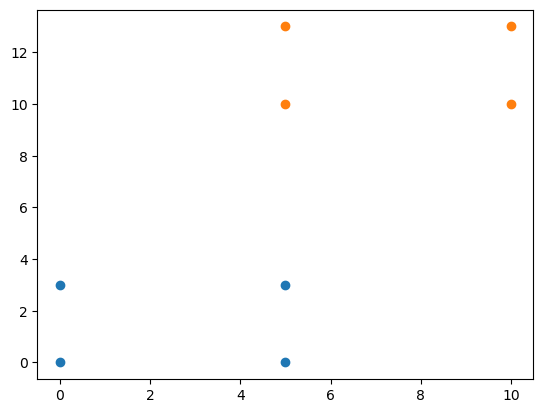

In [3]:
def translate_matrix(tx, ty):
    
    T = np.array([[1., 0., tx],
                  [0., 1., ty]])
    
    return T

tx = 5.
ty = 10.

T = translate_matrix(tx, ty)
points_h = add_ones(points)
points_t = transform(points_h, T)


plt.plot(points[0], points[1], 'o')
plt.plot(points_t[0], points_t[1], 'o')